In [3]:
import numpy as np 
import pandas as pd
import re

# Visualização de Dados
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.metrics import (mean_absolute_error, 
                             accuracy_score, 
                             classification_report, 
                             confusion_matrix,
                             f1_score,
                             ConfusionMatrixDisplay)

# Algoritmos
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Lista das Features e suas Descrições

-    survival:     Sobreviveu ou não 
-    PassengerId:  Id único do passageiro
-    pclass:       Classe da passagem     
-    sex:          Gênero     
-    Age:          Anos de Idade      
-    sibsp:        Número de irmãos / esposas abordo no Titanic     
-    parch:        Número de pais ou filhos abordo no Titanic
-    ticket:       Número da passagem     
-    fare:         Preço que o passageiro pagou pela passagem     
-    cabin:        Número da cabine
-    embarked:     Porto de embarcação

### Passo 1: Análise Exploratória dos Dados


In [4]:
# obtendo os dados
test = pd.read_csv("../data/raw/test.csv")
train_val = pd.read_csv("../data/raw/train.csv")
train_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# análise de dados e obtendo informações acerca do dataset
train_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_val['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
# obtendo uma descrição acerca do dataset por meio de cálculos estatísticos
train_val.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Passo 2: Contagem de dados que estão perdidos

In [8]:
total_null = train_val.isnull().sum().sort_values(ascending=False)
rel_null = train_val.isnull().sum()/train_val.isnull().count()*100
per_null = (round(rel_null, 1)).sort_values(ascending=False)
dados_perdidos = pd.concat([total_null, per_null], axis=1, keys=['Total', '%'])
dados_perdidos.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


### Passo 3: Quais características poderiam significar uma taxa maior de sobrevivência?

Text(0.5, 1.0, 'Male')

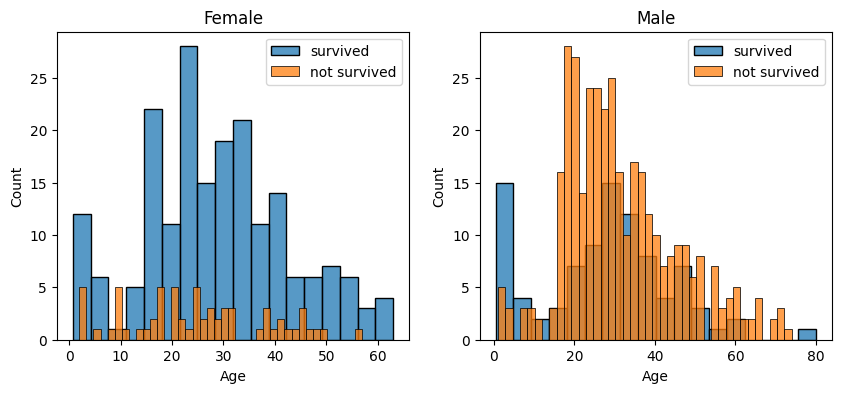

In [9]:
# gênero e idade
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_val[train_val['Sex']=='female']
men = train_val[train_val['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

<Axes: xlabel='Pclass', ylabel='Survived'>

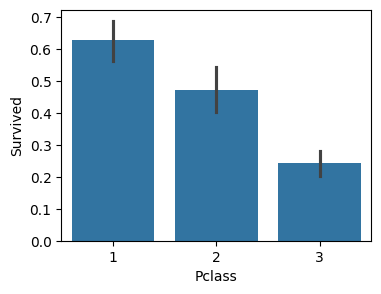

In [10]:
# Pclass
plt.figure(figsize=(4, 3))
sns.barplot(x='Pclass', y='Survived', data=train_val)

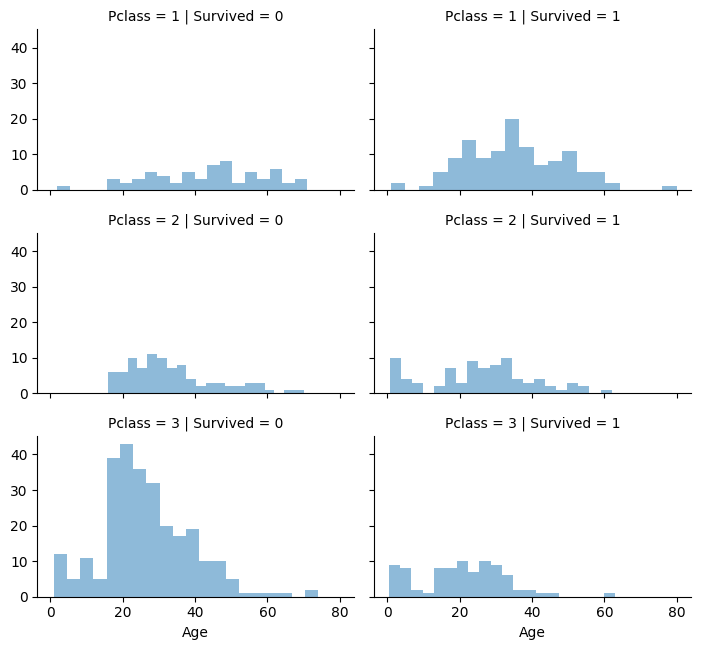

In [11]:
# Pclass
grid = sns.FacetGrid(train_val, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

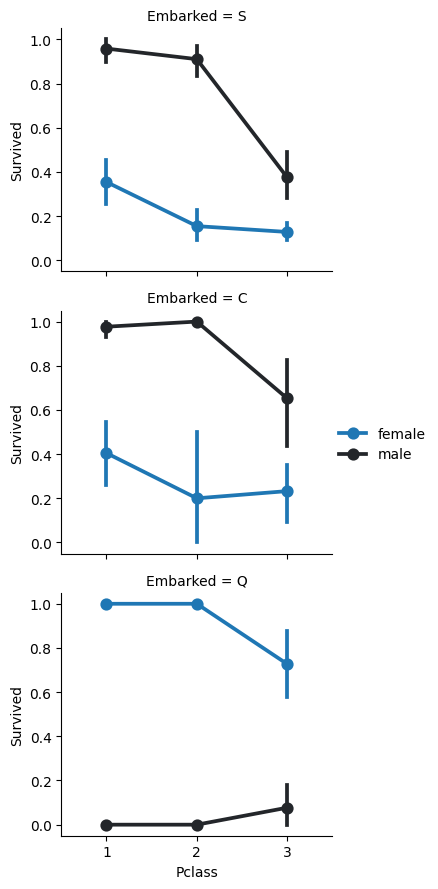

In [12]:
# relação entre o porto de embarcação e o seu impacto nas taxas de sobrevivência
FacetGrid = sns.FacetGrid(train_val, row='Embarked', height=3, aspect=1.2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='dark:#1f77b4', order=None, hue_order=None)
FacetGrid.add_legend()
plt.show()

In [13]:
# juntando duas features em uma, que seriam sibsp e parch, para "relatives"
data = [train_val, test]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'alone'] = 1
    dataset['alone'] = dataset['alone'].astype(int)
train_val['alone'].value_counts()

alone
1    537
0    354
Name: count, dtype: int64

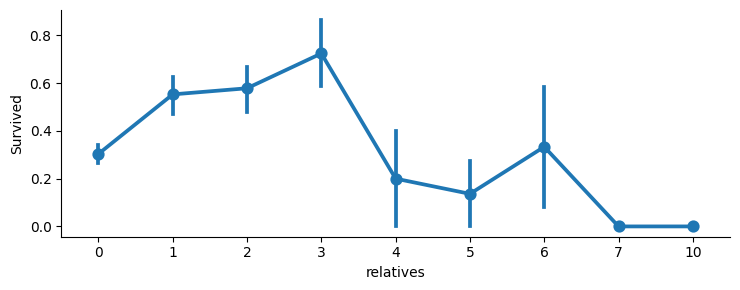

In [14]:
# dando plot para descobrir a relação entre o número de parentes e a taxa de sobrevivência

axes = sns.FacetGrid(train_val, aspect = 2.5)
axes.map(sns.pointplot, 'relatives', 'Survived', palette=None, order=None, hue_order=None)
plt.show()

### Passo 4: Limpeza dos Dados

In [15]:
# tirando a coluna "PassengerId" já que não possui relação com a taxa de sobrevivência
train_val = train_val.drop(['PassengerId'], axis=1)
passenger_id = test.PassengerId
test = test.drop(['PassengerId'], axis=1)

##### Tratando dados perdidos

In [16]:
# Cabin para Deck 

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_val, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

train_val = train_val.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [17]:
# Idade
data = [train_val, test]

for dataset in data:
    mean = train_val["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # gerando números aleatórios entre a média, o desvio padrão e o nulo
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # preencher valores NaN com os valores randômicos obtidos
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_val["Age"].astype(int)
train_val["Age"].isnull().sum()

0

In [18]:
# Embarked
common_value = train_val['Embarked'].describe().top
data = [train_val, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

##### Convertendo as Features no tipo correto e manuseável dos dados

In [19]:
train_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  alone      891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Name       418 non-null    object 
 2   Sex        418 non-null    object 
 3   Age        418 non-null    int32  
 4   SibSp      418 non-null    int64  
 5   Parch      418 non-null    int64  
 6   Ticket     418 non-null    object 
 7   Fare       417 non-null    float64
 8   Embarked   418 non-null    object 
 9   relatives  418 non-null    int64  
 10  alone      418 non-null    int32  
 11  Deck       418 non-null    int32  
dtypes: float64(1), int32(3), int64(4), object(4)
memory usage: 34.4+ KB


In [21]:
# fare
data = [train_val, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [22]:
# Nome
data = [train_val, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extraindo títulos
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # substituindo os títulos por "Rare" ou por algum mais comum
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convertendo os títulos para números
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)

In [23]:
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,alone,Deck,Title
0,3,"Kelly, Mr. James",male,22,0,0,330911,7,Q,0,1,8,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,38,1,0,363272,7,S,1,0,8,3
2,2,"Myles, Mr. Thomas Francis",male,26,0,0,240276,9,Q,0,1,8,1
3,3,"Wirz, Mr. Albert",male,35,0,0,315154,8,S,0,1,8,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35,1,1,3101298,12,S,2,0,8,3
5,3,"Svensson, Mr. Johan Cervin",male,16,0,0,7538,9,S,0,1,8,1
6,3,"Connolly, Miss. Kate",female,54,0,0,330972,7,Q,0,1,8,2
7,2,"Caldwell, Mr. Albert Francis",male,2,1,1,248738,29,S,2,0,8,1
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,27,0,0,2657,7,C,0,1,8,3
9,3,"Davies, Mr. John Samuel",male,14,2,0,A/4 48871,24,S,2,0,8,1


In [24]:
# Gênero
genders = {"male": 0, "female": 1}
data = [train_val, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [25]:
# Ticket
train_val['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [26]:
train_val = train_val.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [27]:
# Embarked
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_val, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Passo 5: Criando categorias

In [28]:
# criando grupos de idade ('Age')
data = [train_val, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

train_val['Age'].value_counts()

Age
5    159
6    158
4    158
3    133
2    121
1     94
0     68
Name: count, dtype: int64

In [29]:
# Fare
train_val.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,7,0,1,0,8,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,71,1,1,0,3,3
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,7,0,0,1,8,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,53,0,1,0,3,3
4,0,3,"Allen, Mr. William Henry",0,5,0,0,8,0,0,1,8,1
5,0,3,"Moran, Mr. James",0,1,0,0,8,2,0,1,8,1
6,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,51,0,0,1,5,1
7,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,21,0,4,0,8,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,11,0,2,0,8,3
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,30,1,1,0,8,3


In [30]:
# criando grupos de preço de passagem ('Fare')
data = [train_val, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [31]:
train_val.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,0,0,1,0,8,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,3,1,1,0,3,3
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,0,0,0,1,8,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,3,0,1,0,3,3
4,0,3,"Allen, Mr. William Henry",0,5,0,0,1,0,0,1,8,1


### Passo 6: Criando novas Features

In [32]:
# Idade baseada na Classe
data = [train_val, test]
for dataset in data:
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']

In [33]:
# Preço de Passagem pela Pessoa
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

train_val.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,"Allen, Mr. William Henry",0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,"Moran, Mr. James",0,1,0,0,1,2,0,1,8,1,3,1
6,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,2,1,1,0,8,3,2,1


In [34]:
train_val.drop(["Name", "Fare"], axis=1, inplace=True)
test.drop(["Name", "Fare"], axis=1, inplace=True)

### Passo 7: Pré-Processamento para Criação de Modelos de Machine Learning

In [35]:
X_train_val = train_val.drop(columns=["Survived"])
y_train_val = train_val['Survived']

X_test = test.copy()

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_values = ["Title", "Pclass", "Embarked", "Deck", "Fare_Per_Person", "Age_Class", "relatives"]

# Criar o transformador de colunas
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_values)
    ],
    remainder='passthrough'
)

# Ajustar e transformar os dados de treinamento
X_train_val_encoded = column_transformer.fit_transform(X_train_val)

# Transformar os dados de teste
X_test_encoded = column_transformer.transform(X_test)

# Obter os nomes das colunas após a transformação
encoded_column_names = column_transformer.named_transformers_['onehot'].get_feature_names_out(categorical_values)

# Criar dataframes com as variáveis dummy e outras colunas
X_train_val_encoded = pd.DataFrame(X_train_val_encoded, columns=list(encoded_column_names) + list(X_train_val.columns.drop(categorical_values)))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=list(encoded_column_names) + list(X_test.columns.drop(categorical_values)))

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded,
                                                  y_train_val,
                                                  stratify = y_train_val,
                                                  test_size=0.2,
                                                  random_state=42)

In [38]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 53), (179, 53), (712,), (179,))

In [39]:
X_train[['Sex', 'Age', 'SibSp',
       'Parch', 'alone']]

,Sex,Age,SibSp,Parch,alone
692,0.0,2.0,0.0,0.0,1.0
481,0.0,5.0,0.0,0.0,1.0
527,0.0,2.0,0.0,0.0,1.0
855,1.0,1.0,0.0,1.0,0.0
801,1.0,4.0,1.0,1.0,0.0
...,...,...,...,...,...
359,1.0,5.0,0.0,0.0,1.0
258,1.0,5.0,0.0,0.0,1.0
736,1.0,6.0,1.0,3.0,0.0
462,0.0,6.0,0.0,0.0,1.0


In [40]:
X_train

,Title_1,Title_2,Title_3,Title_4,Title_5,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,...,relatives_4,relatives_5,relatives_6,relatives_7,relatives_10,Sex,Age,SibSp,Parch,alone
692,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
481,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0
527,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
855,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
801,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0
258,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0
736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,3.0,0.0
462,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0


### Passo 8: Treinamento dos Modelos

#### Modelo de Regressão Logística

In [41]:
# call on the model object
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l2',random_state = 42
                            )

logreg.fit(X_train, y_train)

# Once the model is trained we want to find out how well the model is performing, so we test the model. 
# we use "x_teste" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_val)

In [42]:
accuracy_score(y_true=y_val, y_pred=y_pred)

0.8156424581005587

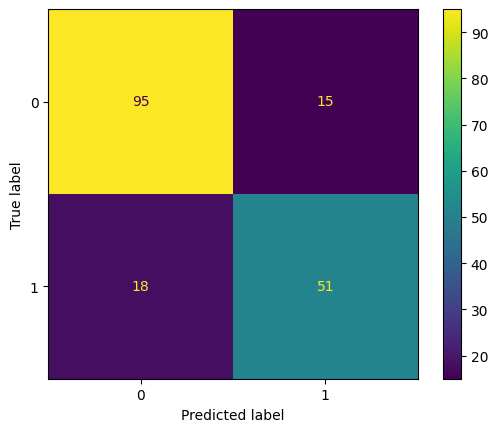

In [43]:
cm = confusion_matrix(y_val, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                        display_labels=logreg.classes_)

disp.plot()
plt.show()

In [44]:
accuracy_score(y_val, y_pred)

0.8156424581005587

In [45]:
from sklearn.metrics import recall_score
recall_score(y_val, y_pred)

0.7391304347826086

In [46]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred)

0.7727272727272727

In [47]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



#### Usando Cross-validation nesse modelo

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
# run model 10x with 60/30 split intentionally leaving out 10%
cv = StratifiedShuffleSplit(n_splits = 5, test_size=.2, random_state = 0)

# saving the feature names for decision tree display
column_names = X_train_val.columns
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X_train_val, y_train_val, cv  = cv)
print ("Cross-Validation accuracy scores: {}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores: [0.79888268 0.80446927 0.81564246 0.81564246 0.78212291]
Mean Cross-Validation accuracy score: 0.80335


#### Usando Grid-Search

In [49]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
## C_vals is the alpha value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state=42)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['l2']},
             scoring='accuracy')

In [50]:
## Getting the best of everything. 
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8058295964125561
{'C': 0.2, 'penalty': 'l2'}
LogisticRegression(C=0.2)


In [51]:
logreg_grid_params = grid.best_params_
logreg_grid_estimator = grid.best_estimator_
logreg_grid_score = grid.best_score_

tab_score = pd.DataFrame({
    'Model': ['Logistic Regression'], 
    'Score': grid.best_score_})
tab_score.head(10)


,Model,Score
0,Logistic Regression,0.80583


#### Treinando com outros modelos

##### K-Nearest Neighbor

##### Usando Grid-Search no classificador KNN 

In [52]:
## trying out multiple values for k
k_range = range(1,31)
weights_options=['uniform','distance'] 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.20, random_state=42)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [53]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7972067039106145
{'n_neighbors': 6, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=6, weights='distance')


In [54]:
knn_grid_score = grid.best_score_
knn_grid_params = grid.best_params_
knn_grid_estimator = grid.best_estimator_

tab_score = pd.DataFrame({
    'Model': ['Logistic Regression'], 
    'Score': grid.best_score_})
tab_score.head(10)

,Model,Score
0,Logistic Regression,0.797207


##### Usando o RandomizedSearchCV (parecido com o Grid-Search, porém mais rápido)

In [55]:
from sklearn.model_selection import RandomizedSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
## for RandomizedSearchCV, 
grid = RandomizedSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1, n_iter=40)
## Fitting the model. 
grid.fit(X_train_val, y_train_val)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=None),
                   estimator=KNeighborsClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   verbose=False)

In [56]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8044776119402984
{'weights': 'distance', 'n_neighbors': 10}
KNeighborsClassifier(n_neighbors=10, weights='distance')


In [57]:
### Using the best parameters from the grid-search.
knn_ran_grid_score = grid.best_score_
knn_ran_grid_params = grid.best_params_
knn_ran_grid_estimator = grid.best_estimator_

tab_score = pd.DataFrame({
    'Model': ['Logistic Regression'], 
    'Score': grid.best_score_})
tab_score.head(10)

,Model,Score
0,Logistic Regression,0.804478


##### Classificador de Árvore de Decisão

In [58]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'sqrt']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
                                n_jobs = -1)
grid.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30,
                                          'sqrt']},
             verbose=False)

In [59]:
print (grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 21}
0.8317929292929293
DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=21)


In [60]:
dectree_grid_score = grid.best_score_
dectree_grid_params = grid.best_params_
dectree_grid_estimator = grid.best_estimator_
## using the best found hyper paremeters to get the score. 

tab_score = pd.DataFrame({
    'Model': ['Logistic Regression'], 
    'Score': grid.best_score_})
tab_score.head(10)

,Model,Score
0,Logistic Regression,0.831793


##### Adicionando e Calculando Importância de Feature

In [61]:
## feature importance
feature_importances = pd.DataFrame(dectree_grid_estimator.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Title,0.664860
Pclass,0.148529
relatives,0.087411
Deck,0.071340
Fare_Per_Person,0.027861
Sex,0.000000
Age,0.000000
SibSp,0.000000
Parch,0.000000
Embarked,0.000000


#### Classificador de Random Forest

In [62]:
n_estimators = [140,145,150,155,160]
max_depth = range(1,10)
criterions = ['gini', 'entropy']
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=42)

parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='sqrt'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [140, 145, 150, 155, 160]})

In [63]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8212686567164178
{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 160}
RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=160)


In [64]:
rf_grid_score = grid.best_score_
rf_grid_params = grid.best_params_
rf_grid_estimator = grid.best_estimator_
## using the best found hyper paremeters to get the score. 

tab_score = pd.DataFrame({
    'Model': ['Logistic Regression'], 
    'Score': grid.best_score_})
tab_score.head(10)

,Model,Score
0,Logistic Regression,0.821269


In [65]:
from sklearn.metrics import classification_report
# Print classification report for y_test
print(classification_report(y_val, y_pred, labels=rf_grid_estimator.classes_))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



##### Calculando Importância de Features Novamente

In [66]:
## feature importance
feature_importances = pd.DataFrame(rf_grid_estimator.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Title,0.309833
Sex,0.262557
Pclass,0.101908
Deck,0.081552
Age_Class,0.056430
relatives,0.053749
Fare_Per_Person,0.036224
Age,0.031527
SibSp,0.027951
Embarked,0.014505


#### Introduzindo o BaggingClassifier

    - Irá separar os dados de treino para usá-los para treinamento dos modelos, sendo que após isso irá realizar a média desses modelos para juntá-los novamente.

In [67]:
from sklearn.ensemble import BaggingClassifier

n_estimators = [10,30,50,70,80,150,160, 170,175,180,185]

cv = StratifiedShuffleSplit(n_splits=10, test_size=.20, random_state=42)

parameters = {'n_estimators':n_estimators, }

grid = GridSearchCV(BaggingClassifier(estimator = None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X_train_val, y_train_val) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [68]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7988826815642459
{'n_estimators': 10}
BaggingClassifier()


In [69]:
bagging_grid_score = grid.best_score_
bagging_grid_params = grid.best_params_
bagging_grid_estimator = grid.best_estimator_
## using the best found hyper paremeters to get the score. 

tab_score = pd.DataFrame({
    'Model': ['Logistic Regression'], 
    'Score': grid.best_score_})
tab_score.head(10)

,Model,Score
0,Logistic Regression,0.798883


In [70]:
tab_mlr = pd.DataFrame({
    'Model': ['logreg_grid', 'random_forest', 'decision_tree_grid', 
              'knn_classifier', 'bagging_classifier'],
    'Score': [logreg_grid_score, rf_grid_score, dectree_grid_score, knn_grid_score, bagging_grid_score]
    })

tab_mlr = tab_mlr.sort_values(by="Score", ascending=False)

tab_mlr

,Model,Score
2,decision_tree_grid,0.831793
1,random_forest,0.821269
0,logreg_grid,0.805830
4,bagging_classifier,0.798883
3,knn_classifier,0.797207


In [71]:
X_train.shape

(712, 53)

In [72]:
X_val.shape

(179, 53)

In [73]:
X_train.columns.values

array(['Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_0', 'Embarked_1', 'Embarked_2',
       'Deck_0', 'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Deck_5',
       'Deck_6', 'Deck_7', 'Deck_8', 'Fare_Per_Person_0',
       'Fare_Per_Person_1', 'Fare_Per_Person_2', 'Fare_Per_Person_3',
       'Fare_Per_Person_4', 'Fare_Per_Person_5', 'Age_Class_0',
       'Age_Class_1', 'Age_Class_2', 'Age_Class_3', 'Age_Class_4',
       'Age_Class_5', 'Age_Class_6', 'Age_Class_8', 'Age_Class_9',
       'Age_Class_10', 'Age_Class_12', 'Age_Class_15', 'Age_Class_18',
       'relatives_0', 'relatives_1', 'relatives_2', 'relatives_3',
       'relatives_4', 'relatives_5', 'relatives_6', 'relatives_7',
       'relatives_10', 'Sex', 'Age', 'SibSp', 'Parch', 'alone'],
      dtype=object)

In [74]:
X_train_val_encoded.columns.values

array(['Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_0', 'Embarked_1', 'Embarked_2',
       'Deck_0', 'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Deck_5',
       'Deck_6', 'Deck_7', 'Deck_8', 'Fare_Per_Person_0',
       'Fare_Per_Person_1', 'Fare_Per_Person_2', 'Fare_Per_Person_3',
       'Fare_Per_Person_4', 'Fare_Per_Person_5', 'Age_Class_0',
       'Age_Class_1', 'Age_Class_2', 'Age_Class_3', 'Age_Class_4',
       'Age_Class_5', 'Age_Class_6', 'Age_Class_8', 'Age_Class_9',
       'Age_Class_10', 'Age_Class_12', 'Age_Class_15', 'Age_Class_18',
       'relatives_0', 'relatives_1', 'relatives_2', 'relatives_3',
       'relatives_4', 'relatives_5', 'relatives_6', 'relatives_7',
       'relatives_10', 'Sex', 'Age', 'SibSp', 'Parch', 'alone'],
      dtype=object)

In [75]:
X_test.columns.values

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'relatives',
       'alone', 'Deck', 'Title', 'Age_Class', 'Fare_Per_Person'],
      dtype=object)

In [77]:
X_test_encoded.columns.values

array(['Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_0', 'Embarked_1', 'Embarked_2',
       'Deck_0', 'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Deck_5',
       'Deck_6', 'Deck_7', 'Deck_8', 'Fare_Per_Person_0',
       'Fare_Per_Person_1', 'Fare_Per_Person_2', 'Fare_Per_Person_3',
       'Fare_Per_Person_4', 'Fare_Per_Person_5', 'Age_Class_0',
       'Age_Class_1', 'Age_Class_2', 'Age_Class_3', 'Age_Class_4',
       'Age_Class_5', 'Age_Class_6', 'Age_Class_8', 'Age_Class_9',
       'Age_Class_10', 'Age_Class_12', 'Age_Class_15', 'Age_Class_18',
       'relatives_0', 'relatives_1', 'relatives_2', 'relatives_3',
       'relatives_4', 'relatives_5', 'relatives_6', 'relatives_7',
       'relatives_10', 'Sex', 'Age', 'SibSp', 'Parch', 'alone'],
      dtype=object)

##### Testando o modelo sem otimização de parâmetros

In [78]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_val)
print('accuracy score: %.2f' % accuracy_score(y_val,y_pred))
print('precision score: %.2f' % precision_score(y_val,y_pred))
print('recall score: %.2f' % recall_score(y_val,y_pred))
print('f1 score: %.2f' % f1_score(y_val,y_pred))

accuracy score: 0.75
precision score: 0.71
recall score: 0.61
f1 score: 0.66


### Passo 9: Fazendo predição a partir do modelo com maior Score

In [92]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=21)
decision_tree.fit(X_train_val_encoded, y_train_val)
y_prediction = decision_tree.predict(X_test_encoded)

In [89]:
passenger_id.value_counts()

PassengerId
892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: count, Length: 418, dtype: int64

In [90]:
X_test_encoded.value_counts()

Title_1  Title_2  Title_3  Title_4  Title_5  Pclass_1  Pclass_2  Pclass_3  Embarked_0  Embarked_1  Embarked_2  Deck_0  Deck_1  Deck_2  Deck_3  Deck_4  Deck_5  Deck_6  Deck_7  Deck_8  Fare_Per_Person_0  Fare_Per_Person_1  Fare_Per_Person_2  Fare_Per_Person_3  Fare_Per_Person_4  Fare_Per_Person_5  Age_Class_0  Age_Class_1  Age_Class_2  Age_Class_3  Age_Class_4  Age_Class_5  Age_Class_6  Age_Class_8  Age_Class_9  Age_Class_10  Age_Class_12  Age_Class_15  Age_Class_18  relatives_0  relatives_1  relatives_2  relatives_3  relatives_4  relatives_5  relatives_6  relatives_7  relatives_10  Sex  Age  SibSp  Parch  alone
1.0      0.0      0.0      0.0      0.0      0.0       0.0       1.0       1.0         0.0         0.0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     1.0                0.0                0.0                0.0                0.0                0.0                0.0          0.0          0.0          0.0          0.0          0.0          0.0    

### Passo 10: Criar Submissão

In [93]:
submission = pd.DataFrame({
    "PassengerId": passenger_id,
    "Survived": y_prediction
})

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic_submission_4.csv", index=False)